### import libaries

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
#pip install gensim
from gensim import corpora, models
#nltk.download('stopwords')
#pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
#pip install advertools
import advertools as adv
from pprint import pprint
#pip install pyldavis
import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

### load datasets 

In [2]:
file_path = "/Users/khevnaparikh/Desktop/Text as Data/Final Project/Twitter Data/"

In [3]:
# 'U1': 'Kyiv, Ukraine',
# 'U2': 'Kharkiv, Ukraine',
# 'U3': 'Odesa, Ukraine',
def load_data_Ukraine(filepath): 
    U1prewar = pd.read_csv(filepath+"U1prewar.csv")
    U1postwar = pd.read_csv(filepath+"U1postwar.csv")
    U2prewar = pd.read_csv(filepath+"U2prewar.csv")
    U2postwar = pd.read_csv(filepath+"U2postwar.csv")
    U3prewar = pd.read_csv(filepath+"U3prewar.csv")
    U3postwar = pd.read_csv(filepath+"U3postwar.csv")
    
    return U1prewar, U1postwar, U2prewar, U2postwar, U3prewar, U3postwar


# 'R1': 'Moscow, Russia',
# 'R2': 'St. Petersburg, Russia',
# 'R3': 'Novosibirsk, Russia'
def load_data_Russia(filepath): 
    R1prewar = pd.read_csv(filepath+"R1prewar.csv")
    R1postwar = pd.read_csv(filepath+"R1postwar.csv")
    R2prewar = pd.read_csv(filepath+"R2prewar.csv")
    R2postwar = pd.read_csv(filepath+"R2postwar.csv")
    R3prewar = pd.read_csv(filepath+"R3prewar.csv")
    R3postwar = pd.read_csv(filepath+"R3postwar.csv")
    
    return R1prewar, R1postwar, R2prewar, R2postwar, R3prewar, R3postwar

Kyiv_prewar, Kyiv_postwar, Kharkiv_prewar, Kharkiv_postwar, Odesa_prewar, Odesa_postwar = load_data_Ukraine(file_path)
Moscow_prewar, Moscow_postwar, Petersburg_prewar, Petersburg_postwar, Novosibirsk_prewar, Novosibirsk_postwar = load_data_Russia(file_path)

### Clean Datasets

In [4]:
prewar = pd.concat([Kyiv_prewar, Kharkiv_prewar, Odesa_prewar, Moscow_prewar, Petersburg_prewar, Novosibirsk_prewar], axis=0)
prewar = prewar.drop(['Unnamed: 0', 'location'], axis=1)
postwar = pd.concat([Kyiv_postwar, Kharkiv_postwar, Odesa_postwar, Moscow_postwar, Petersburg_postwar, Novosibirsk_postwar], axis=0)
postwar = postwar.drop(['Unnamed: 0', 'location'], axis=1)

print(prewar.head(10))
print("Size of Prewar: " , prewar.shape)
print("Size of Postwar: ", postwar.shape)

                  timestamp                                               text
0  2021-11-24T00:59:59.000Z   @ymidi23h Блен, скоро я с тобой за компанию буду
1  2021-11-24T00:59:59.000Z  Хто буде волонтером на модуль з вишмату за сот...
2  2021-11-24T00:59:58.000Z  RT @tjforia: баттер тусила на первом месте бил...
3  2021-11-24T00:59:58.000Z        В чём кот не прав?😉 https://t.co/YGIPINTvEU
4  2021-11-24T00:59:58.000Z  RT @rgrus: Шри-Ланка открыла выставку книг и п...
5  2021-11-24T00:59:57.000Z  RT @gudkov_g: Что происходит в Ю-тьюбе? Мои ин...
6  2021-11-24T00:59:57.000Z  @yannispromo О выборах на УИК 6005 (СОШ 11, Ро...
7  2021-11-24T00:59:56.000Z  «Не было повода заподозрить его в столь чудови...
8  2021-11-24T00:59:56.000Z  RT @LARA84347163: Пісні у виконанні #DimashQud...
9  2021-11-24T00:59:56.000Z  @Zvejnieks98 @ZZ8SS @Aleks_Hit Солдаты Латвии ...
Size of Prewar:  (1149281, 2)
Size of Postwar:  (929651, 2)


In [5]:
prewar1 = prewar.drop_duplicates().reset_index(drop=True)
postwar1 = postwar.drop_duplicates().reset_index(drop=True)

print(prewar1.head(10))
print("Size of Prewar: ", prewar1.shape)
print("Size of Postwar: ", postwar1.shape)

                  timestamp                                               text
0  2021-11-24T00:59:59.000Z   @ymidi23h Блен, скоро я с тобой за компанию буду
1  2021-11-24T00:59:59.000Z  Хто буде волонтером на модуль з вишмату за сот...
2  2021-11-24T00:59:58.000Z  RT @tjforia: баттер тусила на первом месте бил...
3  2021-11-24T00:59:58.000Z        В чём кот не прав?😉 https://t.co/YGIPINTvEU
4  2021-11-24T00:59:58.000Z  RT @rgrus: Шри-Ланка открыла выставку книг и п...
5  2021-11-24T00:59:57.000Z  RT @gudkov_g: Что происходит в Ю-тьюбе? Мои ин...
6  2021-11-24T00:59:57.000Z  @yannispromo О выборах на УИК 6005 (СОШ 11, Ро...
7  2021-11-24T00:59:56.000Z  «Не было повода заподозрить его в столь чудови...
8  2021-11-24T00:59:56.000Z  RT @LARA84347163: Пісні у виконанні #DimashQud...
9  2021-11-24T00:59:56.000Z  @Zvejnieks98 @ZZ8SS @Aleks_Hit Солдаты Латвии ...
Size of Prewar:  (239252, 2)
Size of Postwar:  (182458, 2)


In [6]:
print(prewar1['text'][1])

Хто буде волонтером на модуль з вишмату за сотку?😋😋😋😋😋


##### Lowercase and Remove punctuation

In [7]:
def clean_data(df): 
    #remove punctuation
    df['text'] = df['text'].str.lower() 
    
    text_list = []
    for i in range(df.shape[0]):
        tweet = str(df['text'][i])
        text = re.sub(r'[^\w\s]','',tweet)
        text_list.append(text)
    
    df['text'] = text_list
    return df 

In [8]:
prewar2 = clean_data(prewar1)
postwar2 = clean_data(postwar1)

In [9]:
prewar2['text'][1]

'хто буде волонтером на модуль з вишмату за сотку'

##### Define Language of Tweet

In [10]:
russian_only_chars = ['ё', 'ъ', 'ы', 'э']
ukrainian_only_chars = ['ґ', 'є', 'і', 'ї']
ukr_or_russ_chars = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х','ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я']

def russian(text: str):
    for char in russian_only_chars:
        if char in text:
            return True
    return False

def ukrainian(text: str):
    for char in ukrainian_only_chars:
        if char in text:
            return True
    return False

def ukrainian_or_russian(text: str):
    for char in ukr_or_russ_chars:
        if char in text:
            return True
    return False


def define_langauge(df):
    langauge = [] 
    for i in range(df.shape[0]):
        t = df['text'][i]
        if russian(t):
            langauge.append('russian')
        elif ukrainian(t):
            langauge.append('ukrainian')
        elif ukrainian_or_russian(t):
            langauge.append('either')
        else:
            langauge.append('other')
    df['language'] = langauge
    return df 


In [11]:
prewar3 = define_langauge(prewar2)
postwar3 = define_langauge(postwar2)

In [12]:
prewar3['language'].value_counts()

russian      150369
either        69168
ukrainian     19088
other           627
Name: language, dtype: int64

In [13]:
postwar3['language'].value_counts()

russian      97844
ukrainian    45536
either       38644
other          434
Name: language, dtype: int64

In [14]:
prewar3['text'][1]

'хто буде волонтером на модуль з вишмату за сотку'

#### Most common words

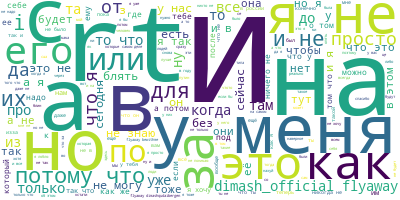

In [15]:
#word cloud: 
long_string = ','.join(list(prewar3['text'].values))
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

#### Remove Stop Words

In [16]:
adv.stopwords.keys()

dict_keys(['arabic', 'azerbaijani', 'bengali', 'catalan', 'chinese', 'croatian', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hindi', 'hungarian', 'indonesian', 'irish', 'italian', 'japanese', 'kazakh', 'nepali', 'norwegian', 'persian', 'polish', 'portuguese', 'romanian', 'russian', 'sinhala', 'spanish', 'swedish', 'tagalog', 'tamil', 'tatar', 'telugu', 'thai', 'turkish', 'ukrainian', 'urdu', 'vietnamese'])

In [17]:
print(sorted(adv.stopwords['russian'])[:50])

['а', 'будем', 'будет', 'будете', 'будешь', 'буду', 'будут', 'будучи', 'будь', 'будьте', 'бы', 'был', 'была', 'были', 'было', 'быть', 'в', 'вам', 'вами', 'вас', 'весь', 'во', 'вот', 'все', 'всего', 'всей', 'всем', 'всеми', 'всему', 'всех', 'всею', 'всея', 'всю', 'вся', 'всё', 'всём', 'вы', 'да', 'для', 'до', 'его', 'едим', 'едят', 'ее', 'ей', 'ел', 'ела', 'ем', 'ему', 'емъ']


In [18]:
print(sorted(adv.stopwords['ukrainian'])[:50])

['а', 'або', 'адже', 'але', 'алло', 'багато', 'без', 'безперервно', 'би', 'близько', 'був', 'буває', 'буде', 'будемо', 'будете', 'будеш', 'буду', 'будуть', 'будь', 'була', 'були', 'було', 'бути', 'бывь', 'більш', 'більше', 'біля', 'в', 'важлива', 'важливе', 'важливий', 'важливі', 'вам', 'вами', 'вас', 'ваш', 'ваша', 'ваше', 'ваші', 'вгору', 'вгорі', 'вдалині', 'вже', 'ви', 'вниз', 'внизу', 'вона', 'вони', 'воно', 'восьмий']


In [19]:
#Create  a list of stop words
stopwords_ru = list(adv.stopwords['russian'])
print(len(stopwords_ru))
stopwords_uk = list(adv.stopwords['ukrainian'])
print(len(stopwords_uk))
stopwords = stopwords_ru + stopwords_uk
print(len(stopwords))
stopwords.remove('прекрасно')
stopwords.remove('прекрасне')
print(len(stopwords))

264
391
655
653


In [20]:
#remove stop words
def remove_stopwords(df, stopwords):
    text_list = []
    for i in range(df.shape[0]):
        tweet = df['text'][i]
        text = tweet.split()
        text_filtered = [word for word in text if not word in stopwords]
        text = ' '.join(text_filtered)
        text_list.append(text)
    df['text'] = text_list
    return df

In [21]:
prewar4 = remove_stopwords(prewar3, stopwords)
postwar4 = remove_stopwords(postwar3, stopwords)
prewar4.head()

,timestamp,text,language
0,2021-11-24T00:59:59.000Z,ymidi23h блен скоро компанию,either
1,2021-11-24T00:59:59.000Z,волонтером модуль вишмату сотку,either
2,2021-11-24T00:59:58.000Z,rt tjforia баттер тусила первом месте биллборд...,russian
3,2021-11-24T00:59:58.000Z,кот прав httpstcoygipintveu,russian
4,2021-11-24T00:59:58.000Z,rt rgrus шриланка открыла выставку книг предме...,russian


In [22]:
print(prewar4['text'][1])

волонтером модуль вишмату сотку


### PRE-WAR WORD CLOUD

In [23]:
#separate out languages: 
prewar_russian = (prewar4.loc[prewar4['language'] == "russian"]).reset_index(drop=True)
postwar_russian = (postwar4.loc[postwar4['language'] == "russian"]).reset_index(drop=True)
prewar_ukrainian = (prewar4.loc[prewar4['language'] == "ukrainian"]).reset_index(drop=True)
postwar_ukrainian = (postwar4.loc[postwar4['language'] == "ukrainian"]).reset_index(drop=True)

PREWAR RUSSIAN


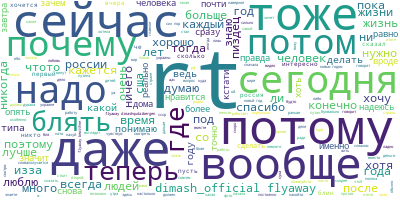

In [24]:
#Create a word cloud 
long_string = ','.join(list(prewar_russian['text'].values))
wordcloud1 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud1.generate(long_string)
print("PREWAR RUSSIAN")
wordcloud1.to_image()

In [25]:
print("      TOP 15 FREQUENT WORDS IN PREWAR TWEETS \n                    RUSSIAN")
top15 = pd.DataFrame(list(wordcloud1.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
top15['English Translation'] =  ['retweet or russia today', 'even', 'because', 'now', 'too', 
                                 'generally', 'today', 'necessary', 'why', 'after', 'now', 
                                 'fuck', 'where', 'dimash_official flyaway', 'more']

top15 = top15[['Tokens','English Translation', 'Frequency',]]
top15

      TOP 15 FREQUENT WORDS IN PREWAR TWEETS 
                    RUSSIAN


,Tokens,English Translation,Frequency
0,rt,retweet or russia today,1.000000
1,даже,even,0.220797
2,потому,because,0.215491
3,сейчас,now,0.195274
4,тоже,too,0.183398
5,вообще,generally,0.180365
6,сегодня,today,0.160907
7,надо,necessary,0.149662
8,почему,why,0.146630
9,потом,after,0.145492


PREWAR UKRAINE


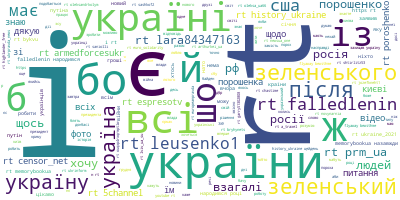

In [26]:
#Create a word cloud 
long_string = ','.join(list(prewar_ukrainian['text'].values))
wordcloud2 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud2.generate(long_string)
print("PREWAR UKRAINE")
wordcloud2.to_image()

In [27]:
print(" TOP 15 FREQUENT WORDS IN PREWAR TWEETS UKRAINIAN")
top15 = pd.DataFrame(list(wordcloud2.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
# print(list(top15['Tokens']))
top15['English Translation'] =  ['and', 'russia today or retweet', 'is', 'of Ukraine', 'for', 'Translation not found', 'all', 
                                 'and', 'Ukraine', 'Translation not found', 'from', 'Translation not found', 'Zelenskyy', 'after', 'Zelenskyy']

top15 = top15[['Tokens','English Translation', 'Frequency']]
top15

 TOP 15 FREQUENT WORDS IN PREWAR TWEETS UKRAINIAN


,Tokens,English Translation,Frequency
0,і,and,1.000000
1,rt,russia today or retweet,0.452156
2,є,is,0.132519
3,україни,of Ukraine,0.109569
4,бо,for,0.098279
5,ж,Translation not found,0.087914
6,всі,all,0.084768
7,й,and,0.080326
8,україні,Ukraine,0.076994
9,б,Translation not found,0.074218


### POST-WAR WORD CLOUD

POSTWAR RUSSIAN


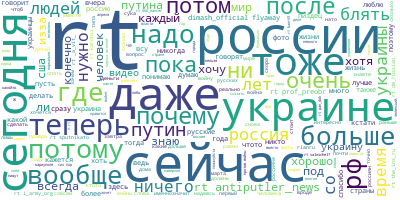

In [28]:
long_string = ','.join(list(postwar_russian['text'].values))
wordcloud3 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud3.generate(long_string)
print("POSTWAR RUSSIAN")
wordcloud3.to_image()

In [29]:
print("TOP 15 FREQUENT WORDS IN POSTWAR TWEETS \n               RUSSIAN")
top15 = pd.DataFrame(list(wordcloud3.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
# print(list(top15['Tokens']))
top15['English Translation'] =  ['rt', 'Russia', 'now', 'even', 'today', 'Ukraine', 'too', 'now',
                                 'because', 'where', 'more', 'generally', ' rf', 'must', 'why']

top15 = top15[['Tokens','English Translation', 'Frequency',]]
top15

TOP 15 FREQUENT WORDS IN POSTWAR TWEETS 
               RUSSIAN


,Tokens,English Translation,Frequency
0,rt,rt,1.000000
1,россии,Russia,0.207539
2,сейчас,now,0.206448
3,даже,even,0.172446
4,сегодня,today,0.150617
5,украине,Ukraine,0.133826
6,тоже,too,0.130384
7,теперь,now,0.128705
8,потому,because,0.128453
9,где,where,0.117790


POSTWAR UKRAINE


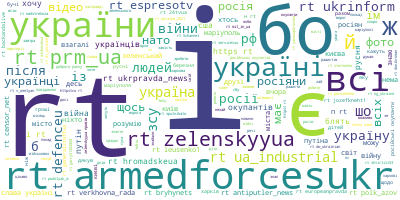

In [30]:
long_string = ','.join(list(postwar_ukrainian['text'].values))
wordcloud4 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud4.generate(long_string)
print("POSTWAR UKRAINE")
wordcloud4.to_image()

In [31]:
print("       TOP 15 FREQUENT WORDS IN POSTWAR TWEETS UKRAINIAN")
top15 = pd.DataFrame(list(wordcloud4.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
# print(list(top15['Tokens']))
top15['English Translation'] =  ['and', 'russia today or retweet', 'is', 'for', 'armedforcesukr', 'all', 'of Ukraine', 'Ukraine',
                                 'Translaiton not found', 'rt zelenskyy ua', 'rt prm_ua (News Channel in Ukraine)', ' and', 
                                 'Twitter account with news of war in Ukraine', 
                                 'Armed forces of Ukraine', 'Translaiton not found']
 
top15 = top15[['Tokens','English Translation', 'Frequency',]]
top15

       TOP 15 FREQUENT WORDS IN POSTWAR TWEETS UKRAINIAN


,Tokens,English Translation,Frequency
0,і,and,1.000000
1,rt,russia today or retweet,0.391470
2,є,is,0.139777
3,бо,for,0.102853
4,rt armedforcesukr,armedforcesukr,0.099227
5,всі,all,0.086251
6,україни,of Ukraine,0.081767
7,україні,Ukraine,0.081004
8,ж,Translaiton not found,0.076138
9,rt zelenskyyua,rt zelenskyy ua,0.074897


In [33]:
# df5 = pd.merge(df1, df3, how="outer", on=["word"])
# df5['absolute_difference'] = df5['prewar frequency'] - df5['postwar frequency']
# df5['absolute_difference'] = df5.absolute_difference.abs()
# df5 = df5.sort_values(by = "absolute_difference", ascending = False) 
# df5[:15]

### LDA Analysis

#### Tokenizaiton

In [34]:
def tokenizaiton(df):
    tokenizer = RegexpTokenizer(r'\w+')
    text_list = []
    for i in range(df.shape[0]):
        tokens = tokenizer.tokenize(df['text'][i])
        text_list.append(tokens)
    return text_list

In [35]:
prewar_RU_tokens = tokenizaiton(prewar_russian)
postwar_RU_tokens = tokenizaiton(postwar_russian)
prewar_UK_tokens = tokenizaiton(prewar_ukrainian)
postwar_UK_tokens = tokenizaiton(postwar_ukrainian)

In [36]:
print(prewar_RU_tokens)
print(postwar_RU_tokens[1])
print(prewar_UK_tokens[1])
print(postwar_UK_tokens[1])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



#### The language 'ukrainian' is not supported. Import Pre-defined class for stemming Ukraine
Source: https://github.com/Amice13/ukr_stemmer/blob/master/ukr_stemmer3.py

In [37]:
import re

class UkrainianStemmer():
    def __init__(self,word):
        self.word = word
        self.vowel = r'аеиоуюяіїє'  # http://uk.wikipedia.org/wiki/Голосний_звук
        self.perfectiveground = r'(ив|ивши|ившись|ыв|ывши|ывшись((?<=[ая])(в|вши|вшись)))$'
        # http://uk.wikipedia.org/wiki/Рефлексивне_дієслово
        self.reflexive = r'(с[яьи])$'
        # http://uk.wikipedia.org/wiki/Прикметник + http://wapedia.mobi/uk/Прикметник
        self.adjective = r'(ими|ій|ий|а|е|ова|ове|ів|є|їй|єє|еє|я|ім|ем|им|ім|их|іх|ою|йми|іми|у|ю|ого|ому|ої)$'
        # http://uk.wikipedia.org/wiki/Дієприкметник
        self.participle = r'(ий|ого|ому|им|ім|а|ій|у|ою|ій|і|их|йми|их)$'
        # http://uk.wikipedia.org/wiki/Дієслово
        self.verb = r'(сь|ся|ив|ать|ять|у|ю|ав|али|учи|ячи|вши|ши|е|ме|ати|яти|є)$'
        # http://uk.wikipedia.org/wiki/Іменник
        self.noun = r'(а|ев|ов|е|ями|ами|еи|и|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я|і|ові|ї|ею|єю|ою|є|еві|ем|єм|ів|їв|ю)$'
        self.rvre = r'[аеиоуюяіїє]'
        self.derivational = r'[^аеиоуюяіїє][аеиоуюяіїє]+[^аеиоуюяіїє]+[аеиоуюяіїє].*(?<=о)сть?$'
        self.RV = ''


    def ukstemmer_search_preprocess(self,word):
        word = word.lower()
        word = word.replace("'", "")
        word = word.replace("ё", "е")
        word = word.replace("ъ", "ї")
        return word

    def s(self,st, reg, to):
        orig = st
        self.RV = re.sub(reg, to, st)
        return (orig != self.RV)

    def stem_word(self):
        word = self.ukstemmer_search_preprocess(self.word)
        if not re.search('[аеиоуюяіїє]', word):
            stem = word
        else:
            p = re.search(self.rvre, word)
            start = word[0:p.span()[1]]
            self.RV = word[p.span()[1]:]

            # Step 1
            if not self.s(self.RV, self.perfectiveground, ''):

                self.s(self.RV, self.reflexive, '')
                if self.s(self.RV, self.adjective, ''):
                    self.s(self.RV, self.participle, '')
                else:
                    if not self.s(self.RV, self.verb, ''):
                        self.s(self.RV, self.noun, '')
            # Step 2
            self.s(self.RV, 'и$', '')

            # Step 3
            if re.search(self.derivational, self.RV):
                self.s(self.RV, 'ость$', '')

            # Step 4
            if self.s(self.RV, 'ь$', ''):
                self.s(self.RV, 'ейше?$', '')
                self.s(self.RV, 'нн$', u'н')

            stem = start + self.RV
        return stem

#### Stemming

In [38]:
def stemming_RU(tokenized_list): 
    stemmed_list = []
    for i in range(len(tokenized_list)):
        stemmer = SnowballStemmer("russian") 
        stemmed = []
        for j in range(len(tokenized_list[i])):
            stemmed.append(stemmer.stem(tokenized_list[i][j]))
        stemmed_list.append(stemmed)
    return stemmed_list

if __name__ == '__main__':
    def stemming_UK(tokenized_list): 
        stemmed_list = []
        for i in range(len(tokenized_list)): 
            stemmed = []
            for j in range(len(tokenized_list[i])):
                stemObj = UkrainianStemmer(tokenized_list[i][j])
                stemmed.append(stemObj.stem_word())
            stemmed_list.append(stemmed)
        return stemmed_list

In [39]:
stemmed_prewar_RU_tokens = stemming_RU(prewar_RU_tokens)
stemmed_postwar_RU_tokens = stemming_RU(postwar_RU_tokens)
stemmed_prewar_UK_tokens = stemming_UK(prewar_UK_tokens)
stemmed_postwar_UK_tokens = stemming_UK(postwar_UK_tokens)

In [40]:
len(stemmed_prewar_RU_tokens)

150369

In [41]:
def tokens_to_DF(tokens_lists): 
    df = pd.DataFrame()
    df['text'] = tokens_lists  
    return df 

In [42]:
prewar_RU_text = tokens_to_DF(stemmed_prewar_RU_tokens)
postwar_RU_text = tokens_to_DF(stemmed_postwar_RU_tokens)
prewar_UK_text = tokens_to_DF(stemmed_prewar_UK_tokens)
postwar_UK_text = tokens_to_DF(stemmed_postwar_UK_tokens)

#### Document Term Matrix

In [43]:
def document_term_matrix(text_list):   
    # Create Dictionary
    dictionary = corpora.Dictionary(text_list)
    #convert to bag of words
    corpus = [dictionary.doc2bow(text) for text in text_list]
    return corpus, dictionary

In [44]:
import warnings, logging
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s', level=logging.ERROR)

In [45]:
%time prewar_RU_corpus, prewar_RU_dictionary = document_term_matrix(stemmed_prewar_RU_tokens)
%time postwar_RU_corpus, postwar_RU_dictionary = document_term_matrix(stemmed_postwar_RU_tokens)
%time prewar_UK_corpus, prewar_UK_dictionary = document_term_matrix(stemmed_prewar_UK_tokens)
%time postwar_UK_corpus, postwar_UK_dictionary = document_term_matrix(stemmed_postwar_UK_tokens)

2022-05-11 15:07:07,924 | INFO | dictionary.py:201 | add_documents | adding document #0 to Dictionary<0 unique tokens: []>
2022-05-11 15:07:08,198 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<31405 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-11 15:07:08,444 | INFO | dictionary.py:201 | add_documents | adding document #20000 to Dictionary<50391 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-11 15:07:08,693 | INFO | dictionary.py:201 | add_documents | adding document #30000 to Dictionary<66539 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-11 15:07:08,942 | INFO | dictionary.py:201 | add_documents | adding document #40000 to Dictionary<81315 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-11 15:07:09,208 | INFO | dictionary.py:201 | add_documents | adding document #50000 to Dictionary<94669 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']..

CPU times: user 5.79 s, sys: 138 ms, total: 5.93 s
Wall time: 5.97 s


2022-05-11 15:07:14,142 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<25795 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-11 15:07:14,405 | INFO | dictionary.py:201 | add_documents | adding document #20000 to Dictionary<41789 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-11 15:07:14,669 | INFO | dictionary.py:201 | add_documents | adding document #30000 to Dictionary<56024 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-11 15:07:14,928 | INFO | dictionary.py:201 | add_documents | adding document #40000 to Dictionary<69143 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-11 15:07:15,190 | INFO | dictionary.py:201 | add_documents | adding document #50000 to Dictionary<80434 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-11 15:07:15,462 | INFO | di

CPU times: user 3.68 s, sys: 84.6 ms, total: 3.76 s
Wall time: 3.78 s


2022-05-11 15:07:17,901 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<31213 unique tokens: ['dimashqudaibergеn', 'flyaw', 'lara84347163', 'rt', 'бог']...>
2022-05-11 15:07:18,126 | INFO | dictionary.py:206 | add_documents | built Dictionary<48048 unique tokens: ['dimashqudaibergеn', 'flyaw', 'lara84347163', 'rt', 'бог']...> from 19088 documents (total 228086 corpus positions)
2022-05-11 15:07:18,127 | INFO | utils.py:448 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary<48048 unique tokens: ['dimashqudaibergеn', 'flyaw', 'lara84347163', 'rt', 'бог']...> from 19088 documents (total 228086 corpus positions)", 'datetime': '2022-05-11T15:07:18.127107', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2022-05-11 15:07:18,375 | INFO | dictionary.py:201 | add_documents | adding document #0 to Dictionary<0 unique tokens: []>


CPU times: user 677 ms, sys: 20.4 ms, total: 697 ms
Wall time: 700 ms


2022-05-11 15:07:18,611 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<24247 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-11 15:07:18,853 | INFO | dictionary.py:201 | add_documents | adding document #20000 to Dictionary<39846 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-11 15:07:19,101 | INFO | dictionary.py:201 | add_documents | adding document #30000 to Dictionary<53368 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-11 15:07:19,341 | INFO | dictionary.py:201 | add_documents | adding document #40000 to Dictionary<65881 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-11 15:07:19,476 | INFO | dictionary.py:206 | add_documents | built Dictionary<72796 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...> from 45536 documents (total 566142 corpus positions)
2022-05-11 15:07:19,477 | INFO | utils.py:448 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary

CPU times: user 2.14 s, sys: 46.3 ms, total: 2.19 s
Wall time: 2.19 s


In [46]:
print(prewar_RU_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1)]


In [47]:
#How to interpret the above corpus and dictionaries: 
[[(prewar_RU_dictionary[i], freq) for i, freq in doc] for doc in prewar_RU_corpus[:1]]

[[('rt', 1),
  ('tjforia', 1),
  ('б', 1),
  ('баттер', 1),
  ('биллборд', 1),
  ('год', 1),
  ('дава', 1),
  ('мест', 1),
  ('номинирова', 1),
  ('перв', 1),
  ('песн', 2),
  ('проб', 1),
  ('туд', 1),
  ('тус', 1)]]

### Build Model

In [48]:
corpus = [prewar_RU_corpus, postwar_RU_corpus, prewar_UK_corpus, postwar_UK_corpus]
dictionaries = [prewar_RU_dictionary, postwar_RU_dictionary, prewar_UK_dictionary, postwar_UK_dictionary]

#### prewar_RU_lda

In [49]:
prewar_RU_lda = models.ldamodel.LdaModel(corpus=prewar_RU_corpus, id2word=prewar_RU_dictionary, num_topics=20)

2022-05-11 15:07:20,724 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-11 15:07:20,730 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-11 15:07:20,781 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-11 15:07:21,188 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 150369 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-11 15:07:21,192 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/150369
2022-05-11 15:07:22,272 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 150369 documents
2022-05-11 15:07:22,459 | INFO | ldamodel.py:1196 | show_topics | topic #6 (0.050): 0.035*"rt" + 0.007*"блят" + 0.006*"говор" + 0.005*"дела" + 0.005*"сдела" + 0.00

#### postwar_RU_lda

In [50]:
postwar_RU_lda = models.ldamodel.LdaModel(corpus=postwar_RU_corpus,id2word=postwar_RU_dictionary,num_topics=20)

2022-05-11 15:08:33,132 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-11 15:08:33,136 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-11 15:08:33,184 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-11 15:08:33,542 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 97844 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-11 15:08:33,545 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/97844
2022-05-11 15:08:34,791 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 97844 documents
2022-05-11 15:08:34,976 | INFO | ldamodel.py:1196 | show_topics | topic #5 (0.050): 0.036*"rt" + 0.005*"где" + 0.005*"ноч" + 0.005*"сейчас" + 0.004*"год" + 0.004*"мит

#### prewar_UK_lda

In [51]:
prewar_UK_lda = models.ldamodel.LdaModel(corpus=prewar_UK_corpus,id2word=prewar_UK_dictionary,num_topics=20)

2022-05-11 15:09:12,007 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-11 15:09:12,011 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-11 15:09:12,022 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-11 15:09:12,154 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 19088 documents, updating model once every 2000 documents, evaluating perplexity every 19088 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-11 15:09:12,155 | WARNING | ldamodel.py:958 | update | too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-11 15:09:12,159 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/19088
2022-05-11 15:09:13,109 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model o

#### postwar_UK_lda

In [52]:
postwar_UK_lda = models.ldamodel.LdaModel(corpus=postwar_UK_corpus,id2word=postwar_UK_dictionary,num_topics=20)

2022-05-11 15:09:18,519 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-11 15:09:18,525 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-11 15:09:18,547 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-11 15:09:18,710 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 45536 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-11 15:09:18,712 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/45536
2022-05-11 15:09:19,726 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 45536 documents
2022-05-11 15:09:19,815 | INFO | ldamodel.py:1196 | show_topics | topic #13 (0.050): 0.058*"rt" + 0.019*"україн" + 0.011*"zelenskyyua" + 0.010*"і" + 0.008*"ки" + 0.00

### Model Analysis

In [54]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=prewar_RU_lda, corpus=prewar_RU_corpus, dictionary = prewar_RU_dictionary, coherence='u_mass')
coherence_lda_PR_RU = coherence_model_lda.get_coherence()

coherence_model_lda = CoherenceModel(model=postwar_RU_lda, corpus=postwar_RU_corpus, dictionary =  postwar_RU_dictionary, coherence='u_mass')
coherence_lda_PO_RU = coherence_model_lda.get_coherence()

coherence_model_lda = CoherenceModel(model=prewar_UK_lda, corpus=prewar_UK_corpus, dictionary = prewar_UK_dictionary, coherence='u_mass')
coherence_lda_PR_UK = coherence_model_lda.get_coherence()

coherence_model_lda = CoherenceModel(model=postwar_UK_lda, corpus=postwar_UK_corpus, dictionary = postwar_UK_dictionary, coherence='u_mass')
coherence_lda_PO_UK = coherence_model_lda.get_coherence()

2022-05-11 15:10:19,729 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 1000 documents
2022-05-11 15:10:19,736 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 2000 documents
2022-05-11 15:10:19,752 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 3000 documents
2022-05-11 15:10:19,769 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 4000 documents
2022-05-11 15:10:19,782 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 5000 documents
2022-05-11 15:10:19,795 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 6000 documents
2022-05-11 15:10:19,807 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 7000 documents
2022-05-11 15:10:19,819 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 8000 documents
2022-05-11 15:10

In [57]:
print('PW_RU Coherence Score: ', coherence_lda_PR_RU)
print('PO_RU Coherence Score: ', coherence_lda_PO_RU)
print('PW_UK Coherence Score: ', coherence_lda_PR_UK)
print('PO_UK Coherence Score: ', coherence_lda_PO_UK)

PW_RU Coherence Score:  -7.134517541072232
PO_RU Coherence Score:  -7.028946719020212
PW_UK Coherence Score:  -10.476097873341393
PO_UK Coherence Score:  -8.689499450843691


In [69]:
# print("\n                                                    POST WAR RUSSIA")
# postwar_RU_topics = {'Topic_' + str(i): [token for token, score in postwar_RU_lda.show_topic(i, topn=15)] for i in range(0, postwar_RU_lda.num_topics)}
# topics = [list(postwar_RU_topics["Topic_3"]), list(postwar_RU_topics["Topic_4"]), list(postwar_RU_topics["Topic_5"])]
# RU_postwar = pd.DataFrame(topics).T
# RU_postwar.columns = ["Top Words: Topic 3","Top Words: Topic 4", "Top Words: Topic 5"]

# english_3 = ['fuck', 'deeds', 'happy', 'correct', 'rt', 'telling', 'bitch', 'nah', 'zab', 'done', 
#            'beginning', 'druz', 'too ', 'problems', 'found']

# english_4 = ['Russian', 'rt', 'kill', 'kill', 'arm', 'Ukrainian', 'girls', 'land', 'ship',
#              'world', 'fascist', 'death', 'duty ', 'Putin', 'Kherson']

# english_5 = ['rt', 'ukrain', 'putin', 'war', 'ross', 'victories', 'people', 'last', 'court',
#              'countries', 'rossiysk', 'weapons', 'bombs', 'world', 'beginning']

# RU_postwar['English Translation: Topic 3'] = english_3 
# RU_postwar['English Translation: Topic 4'] = english_4 
# RU_postwar['English Translation: Topic 5'] = english_5 
# RU_postwar = RU_postwar[["Top Words: Topic 3",'English Translation: Topic 3', "Top Words: Topic 4", 
#                        'English Translation: Topic 4', "Top Words: Topic 5", 'English Translation: Topic 5',]]
# RU_postwar


print("\n                                                    POST WAR UKRAINE")
postwar_UK_topics = {'Topic_' + str(i): [token for token, score in postwar_UK_lda.show_topic(i, topn=20)] for i in range(0, postwar_UK_lda.num_topics)}      
topics = [list(postwar_UK_topics["Topic_1"]), list(postwar_UK_topics["Topic_3"]), list(postwar_UK_topics["Topic_4"])]
UK_postwar = pd.DataFrame(topics).T
UK_postwar.columns = ["Top Words: Topic 1","Top Words: Topic 3", "Top Words: Topic 4"]

english_1 =['rt', 'ukraine', 'i', 'zelensk', 'president', 'zelenskyyua', 'usa', 'ma', 'rosi', 'support', 
            'wars', 'poland', 'rad','people',' ros', 'un', 'rights', 'russian', 'news', 'Vladimir']


english_4 = ['rt', 'and', 'though', 'because', 'friend', 'gentleman', 'moscow', 'time', 'knows',
             ' guy ',' good ',' does', 'moment ',' night ',' live ',' tweet ',' incredible '
             ,' all ',' reminder ',' bear ']

english_3 = ['languages', 'rt', 'Crimea', 'dum', 'full', 'histories',' children ',
             ' rosn ',' waters', 'zavd', 'ok', 'davait', 'sprav' , 'questions',
             'main', 'actually', 'Ukrainian', '40', 'cat', 'deputy']

UK_postwar['English Translation: Topic 1'] = english_1
UK_postwar['English Translation: Topic 3'] = english_3 
UK_postwar['English Translation: Topic 4'] = english_4 
UK_postwar = UK_postwar[["Top Words: Topic 1",'English Translation: Topic 1', "Top Words: Topic 3", 
                       'English Translation: Topic 3', "Top Words: Topic 4", 'English Translation: Topic 4',]]
UK_postwar


                                                    POST WAR UKRAINE


,Top Words: Topic 1,English Translation: Topic 1,Top Words: Topic 3,English Translation: Topic 3,Top Words: Topic 4,English Translation: Topic 4
0,rt,rt,rt,languages,і,rt
1,і,ukraine,пан,rt,rt,and
2,сел,i,і,Crimea,як,though
3,област,zelensk,5,dum,шо,because
4,російськ,president,рівн,full,бо,friend
5,україн,zelenskyyua,україн,histories,що,gentleman
6,кожн,usa,арестович,children,ж,moscow
7,маріупол,ma,3,rosn,й,time
8,із,rosi,зрадник,waters,хоч,knows
9,рад,support,стар,zavd,всі,guy


In [58]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
prewar_RU_visual = pyLDAvis.gensim_models.prepare(prewar_RU_lda, prewar_RU_corpus, prewar_RU_dictionary)
prewar_RU_visual

/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnap

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.298699 -0.010869       1        1  11.319242
7     -0.274780  0.006339       2        1  10.009100
1      0.022206  0.194952       3        1   6.767463
19    -0.138669 -0.155097       4        1   5.882179
10    -0.017574  0.284806       5        1   5.646755
17    -0.018952  0.134393       6        1   5.633597
2      0.065888 -0.030998       7        1   5.077272
14    -0.028786 -0.034438       8        1   4.972608
4      0.020231 -0.028460       9        1   4.536660
8      0.010775 -0.043861      10        1   4.429826
18    -0.067320 -0.063964      11        1   4.334037
6      0.002974 -0.034890      12        1   4.075671
11     0.045335 -0.010124      13        1   3.852195
12     0.106185  0.017994      14        1   3.771506
15     0.072600 -0.027822      15        1   3.695694
3      0.104801 -0.014929      16        1   3.589837
16     0.060702 -0.028652      17        1   3.535574
13     0.084973 -0.029019      18        1   3.384437
9      0.108123 -0.062614      19        1   2.896605
0      0.139986 -0.062748      20        1   2.589741, topic_info=                 Term          Freq         Total Category  logprob  loglift
407   dimash_official   8149.000000   8149.000000  Default  30.0000  30.0000
0                  rt  72892.000000  72892.000000  Default  29.0000  29.0000
408           flyaway   6244.000000   6244.000000  Default  28.0000  28.0000
382               нов   6268.000000   6268.000000  Default  27.0000  27.0000
5                 год   7310.000000   7310.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
5040             мозг    376.479553    667.112605  Topic20  -4.8021   3.0815
1299           женщин    408.950674   1673.240902  Topic20  -4.7193   2.2447
246                уж    327.202084    697.041092  Topic20  -4.9424   2.8973
0                  rt    660.025531  72892.540875  Topic20  -4.2407  -1.0509
924                рф    291.528294    943.423241  Topic20  -5.0578   2.4792

[956 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
541       3  0.167340      1
541       6  0.001217      1
541       8  0.502628      1
541      10  0.098578      1
541      11  0.119268      1
...     ...       ...    ...
1810      6  0.783812   явля
1810      8  0.001449   явля
2173     18  0.998810   язык
6172     14  0.998212  январ
1678     18  0.995336    ярк

[2212 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 2, 20, 11, 18, 3, 15, 5, 9, 19, 7, 12, 13, 16, 4, 17, 14, 10, 1])

In [59]:
pyLDAvis.enable_notebook()
postwar_RU_visual = pyLDAvis.gensim_models.prepare(postwar_RU_lda, postwar_RU_corpus, postwar_RU_dictionary)
postwar_RU_visual

/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.265951 -0.012088       1        1  10.594146
10     0.179269  0.003220       2        1   6.082243
15     0.045655 -0.109174       3        1   6.072772
14    -0.067879 -0.141538       4        1   6.027545
11     0.025994 -0.131749       5        1   5.863745
12     0.140975 -0.005288       6        1   5.787212
8     -0.124197 -0.137497       7        1   5.673564
17    -0.039694 -0.011066       8        1   5.670171
16     0.123950  0.021553       9        1   5.032729
6     -0.054280 -0.113138      10        1   4.838251
19    -0.057865 -0.053822      11        1   4.639791
5     -0.077155 -0.042141      12        1   4.602884
1      0.061328  0.024810      13        1   4.229189
0     -0.015735  0.023037      14        1   4.212369
7      0.080824  0.137619      15        1   4.012716
3     -0.142580  0.021107      16        1   3.823115
13    -0.157909  0.060867      17        1   3.581739
18    -0.071160  0.126299      18        1   3.425242
9     -0.015133  0.150622      19        1   3.178834
2     -0.100359  0.188367      20        1   2.651743, topic_info=                 Term         Freq         Total Category  logprob  loglift
5492  dimash_official  3410.000000   3410.000000  Default  30.0000  30.0000
238               как  3579.000000   3579.000000  Default  29.0000  29.0000
57             украин  9554.000000   9554.000000  Default  28.0000  28.0000
317          российск  5949.000000   5949.000000  Default  27.0000  27.0000
159              росс  7843.000000   7843.000000  Default  26.0000  26.0000
...               ...          ...           ...      ...      ...      ...
2102          остальн   458.617773    573.568823  Topic20  -4.2713   3.4063
3568           открыт   286.348248    327.883348  Topic20  -4.7423   3.4945
5033               50   237.975676    283.938289  Topic20  -4.9273   3.4534
35                 rt   556.325027  74516.550606  Topic20  -4.0781  -1.2675
2266              две   205.627734    568.735217  Topic20  -5.0734   2.6126

[1052 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
866       1  0.066817     1
866       3  0.011136     1
866       5  0.007424     1
866       6  0.010394     1
866       7  0.000742     1
...     ...       ...   ...
4566      6  0.994931    эх
658      15  0.996090  явля
3546     19  0.996429  япон
8380      8  0.992688   ярк
219      16  0.995210   ясн

[2879 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 11, 16, 15, 12, 13, 9, 18, 17, 7, 20, 6, 2, 1, 8, 4, 14, 19, 10, 3])

In [60]:
prewar_UK_visual = pyLDAvis.gensim_models.prepare(prewar_UK_lda, prewar_UK_corpus, prewar_UK_dictionary)
prewar_UK_visual

/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
19    -0.188174  0.077423       1        1  9.688969
1     -0.092978 -0.194793       2        1  7.733858
8     -0.124338  0.065265       3        1  6.845877
11    -0.042972 -0.066808       4        1  6.004214
2     -0.076485  0.086365       5        1  5.767820
5     -0.053483 -0.006760       6        1  5.611421
4     -0.035087 -0.050628       7        1  5.545460
12    -0.018017 -0.079963       8        1  5.281067
9     -0.016685 -0.019760       9        1  4.754427
13    -0.004668 -0.043505      10        1  4.670866
10    -0.037021  0.074827      11        1  4.655428
18     0.084357 -0.107232      12        1  4.189907
0      0.039777  0.039940      13        1  4.112504
14     0.046225 -0.012537      14        1  4.011519
15     0.069886  0.094202      15        1  3.978933
17     0.113053 -0.043468      16        1  3.756423
16     0.052599  0.000249      17        1  3.649049
6      0.108771  0.014520      18        1  3.539844
3      0.058508  0.144519      19        1  3.393743
7      0.116732  0.028145      20        1  2.808669, topic_info=        Term         Freq         Total Category  logprob  loglift
217   україн  3348.000000   3348.000000  Default  30.0000  30.0000
14         і  6869.000000   6869.000000  Default  29.0000  29.0000
547       шо   509.000000    509.000000  Default  28.0000  28.0000
1944    збро   310.000000    310.000000  Default  27.0000  27.0000
1272   народ   552.000000    552.000000  Default  26.0000  26.0000
...      ...          ...           ...      ...      ...      ...
3         rt   186.360915  13434.212255  Topic20  -3.5373  -0.7054
217   україн    78.837549   3348.205912  Topic20  -4.3976  -0.1763
14         і    92.726834   6869.425120  Topic20  -4.2354  -0.7327
915    робот    38.921916    234.627992  Topic20  -5.1035   1.7760
209     всіх    29.372744    209.263009  Topic20  -5.3850   1.6089

[1198 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
223       5  0.910820     000
223       9  0.013394     000
223      14  0.066972     000
224       2  0.115409       1
224       3  0.100983       1
...     ...       ...     ...
4184     15  0.911436     їхн
4184     17  0.012659     їхн
7950      4  0.963999    やまぴー
7952      4  0.976805  山pℓσνє
7953      4  0.985233    山下智久

[3058 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 2, 9, 12, 3, 6, 5, 13, 10, 14, 11, 19, 1, 15, 16, 18, 17, 7, 4, 8])

In [61]:
postwar_UK_visual = pyLDAvis.gensim_models.prepare(postwar_UK_lda, postwar_UK_corpus, postwar_UK_dictionary)
postwar_UK_visual

/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.065366  0.168291       1        1  9.613408
4      0.238914 -0.111766       2        1  8.837669
1      0.043843  0.123777       3        1  7.602179
17     0.101928  0.014168       4        1  5.859625
8      0.086307  0.000733       5        1  5.489494
12     0.024935  0.068799       6        1  5.429674
0     -0.041400  0.144140       7        1  5.227350
11     0.072768 -0.036412       8        1  4.923326
14     0.060641 -0.094898       9        1  4.608354
16    -0.109872  0.137901      10        1  4.468749
15     0.043509 -0.072644      11        1  4.426532
7      0.007900 -0.015995      12        1  4.183555
5      0.013771 -0.057562      13        1  4.164225
9     -0.070716  0.084593      14        1  4.117459
3     -0.034391 -0.045606      15        1  3.941087
10    -0.039317  0.015980      16        1  3.775858
19    -0.053826 -0.049157      17        1  3.763042
2     -0.113219 -0.082933      18        1  3.531112
13    -0.091147 -0.050219      19        1  3.469255
6     -0.205993 -0.141191      20        1  2.568047, topic_info=           Term          Freq         Total Category  logprob  loglift
25            і  15685.000000  15685.000000  Default  30.0000  30.0000
2755   маріупол   2561.000000   2561.000000  Default  29.0000  29.0000
48       україн   7852.000000   7852.000000  Default  28.0000  28.0000
53     зеленськ   1085.000000   1085.000000  Default  27.0000  27.0000
334      військ   1097.000000   1097.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
3387  повідомил    122.962472    142.942692  Topic20  -4.7727   3.5115
2372  espresotv    284.823661    531.823366  Topic20  -3.9327   3.0376
102          нє    185.311830    284.428596  Topic20  -4.3625   3.2336
2277     морськ     87.836068     92.712282  Topic20  -5.1091   3.6080
28           rt    396.057116  43509.229423  Topic20  -3.6030  -1.0371

[1129 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3288     16  0.987653  000
2039      1  0.093028    1
2039      3  0.002620    1
2039      5  0.007861    1
2039      7  0.001310    1
...     ...       ...  ...
690       8  0.010095   їм
690      11  0.001442   їм
690      16  0.004326   їм
690      17  0.001442   їм
690      20  0.001442   їм

[2876 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 5, 2, 18, 9, 13, 1, 12, 15, 17, 16, 8, 6, 10, 4, 11, 20, 3, 14, 7])